In [1]:
## Importing libraries
import boto3
import pandas as pd
import numpy as np
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt 
import variable_engineering as ve
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
pd.set_option('display.max_columns', 200)

In [ ]:
## Reading cleaned data from MiceForest Imputer
train = pd.read_csv('/home/ec2-user/SageMaker/Analytics_Data_Science/American_Express/Evan/amex_train_cleaned.csv')
test = pd.read_csv('/home/ec2-user/SageMaker/Analytics_Data_Science/American_Express/Evan/amex_test_cleaned.csv')

## Printing the first five observations
train.head()

In [4]:
## Defining the bucket
s3 = boto3.resource('s3')
bucket_name = 'evan-callaghan-bucket'
bucket = s3.Bucket(bucket_name)

file_key = 'Kaggle-American-Express-Default/amex_train_data.csv'
file_key2 = 'Kaggle-American-Express-Default/amex_train_labels.csv'

bucket_object = bucket.Object(file_key)
bucket_object2 = bucket.Object(file_key2)

file_object = bucket_object.get()
file_object2 = bucket_object2.get()

file_content_stream = file_object.get('Body')
file_content_stream2 = file_object2.get('Body')

## Creating data-type dictionary for reading the train data-frame
dtype_dict = {'customer_ID': "object", 'S_2': "object", 'P_2': 'float16', 'D_39': 'float16', 'B_1': 'float16','B_2': 'float16', 'R_1': 'float16','S_3': 'float16','D_41': 'float16','B_3': 'float16','D_42': 'float16','D_43': 'float16','D_44': 'float16', 'B_4': 'float16','D_45': 'float16','B_5': 'float16','R_2': 'float16','D_46': 'float16','D_47': 'float16','D_48': 'float16', 'D_49': 'float16','B_6': 'float16','B_7': 'float16','B_8': 'float16','D_50': 'float16','D_51': 'float16','B_9': 'float16', 'R_3': 'float16','D_52': 'float16','P_3': 'float16','B_10': 'float16','D_53': 'float16','S_5': 'float16','B_11': 'float16', 'S_6': 'float16','D_54': 'float16','R_4': 'float16','S_7': 'float16','B_12': 'float16','S_8': 'float16','D_55': 'float16', 'D_56': 'float16','B_13': 'float16','R_5': 'float16','D_58': 'float16','S_9': 'float16','B_14': 'float16','D_59': 'float16', 'D_60': 'float16','D_61': 'float16','B_15': 'float16','S_11': 'float16','D_62': 'float16','D_63': 'object','D_64': 'object', 'D_65': 'float16','B_16': 'float16','B_17': 'float16','B_18': 'float16','B_19': 'float16','D_66': 'float16','B_20': 'float16', 'D_68': 'float16','S_12': 'float16','R_6': 'float16','S_13': 'float16','B_21': 'float16','D_69': 'float16','B_22': 'float16', 'D_70': 'float16','D_71': 'float16','D_72': 'float16','S_15': 'float16','B_23': 'float16','D_73': 'float16','P_4': 'float16', 'D_74': 'float16','D_75': 'float16','D_76': 'float16','B_24': 'float16','R_7': 'float16','D_77': 'float16','B_25': 'float16', 'B_26': 'float16','D_78': 'float16','D_79': 'float16','R_8': 'float16','R_9': 'float16','S_16': 'float16','D_80': 'float16', 'R_10': 'float16','R_11': 'float16','B_27': 'float16','D_81': 'float16','D_82': 'float16','S_17': 'float16','R_12': 'float16', 'B_28': 'float16','R_13': 'float16','D_83': 'float16','R_14': 'float16','R_15': 'float16','D_84': 'float16','R_16': 'float16', 'B_29': 'float16','B_30': 'float16','S_18': 'float16','D_86': 'float16','D_87': 'float16','R_17': 'float16','R_18': 'float16', 'D_88': 'float16','B_31': 'int64','S_19': 'float16','R_19': 'float16','B_32': 'float16','S_20': 'float16','R_20': 'float16', 'R_21': 'float16','B_33': 'float16','D_89': 'float16','R_22': 'float16','R_23': 'float16','D_91': 'float16','D_92': 'float16', 'D_93': 'float16','D_94': 'float16','R_24': 'float16','R_25': 'float16','D_96': 'float16','S_22': 'float16','S_23': 'float16', 'S_24': 'float16','S_25': 'float16','S_26': 'float16','D_102': 'float16','D_103': 'float16','D_104': 'float16','D_105': 'float16', 'D_106': 'float16','D_107': 'float16','B_36': 'float16','B_37': 'float16', 'R_26': 'float16','R_27': 'float16','B_38': 'float16', 'D_108': 'float16','D_109': 'float16','D_110': 'float16','D_111': 'float16','B_39': 'float16','D_112': 'float16','B_40': 'float16', 'S_27': 'float16','D_113': 'float16','D_114': 'float16','D_115': 'float16','D_116': 'float16','D_117': 'float16','D_118': 'float16', 'D_119': 'float16','D_120': 'float16','D_121': 'float16','D_122': 'float16','D_123': 'float16','D_124': 'float16','D_125': 'float16', 'D_126': 'float16','D_127': 'float16','D_128': 'float16','D_129': 'float16','B_41': 'float16','B_42': 'float16','D_130': 'float16', 'D_131': 'float16','D_132': 'float16','D_133': 'float16','R_28': 'float16','D_134': 'float16','D_135': 'float16','D_136': 'float16', 'D_137': 'float16','D_138': 'float16','D_139': 'float16','D_140': 'float16','D_141': 'float16','D_142': 'float16','D_143': 'float16', 'D_144': 'float16','D_145': 'float16'}

## Reading the data
train = pd.read_csv(file_content_stream, dtype = dtype_dict)
labels = pd.read_csv(file_content_stream2, dtype = dtype_dict)

## Subsetting the data for Payment and Spend variables
train = train[['customer_ID', 'P_2', 'P_3', 'P_4', 'S_3', 'S_5', 'S_6', 'S_7', 'S_8', 'S_9', 'S_11', 'S_12', 'S_13', 'S_15', 'S_16', 'S_17', 
               'S_18', 'S_19', 'S_20', 'S_22', 'S_23', 'S_24', 'S_25', 'S_26', 'S_27']]

## Appending target variables
train = pd.merge(train, labels, on = 'customer_ID', how = 'left')
train.head()

print(train.head())

                                         customer_ID       P_2       P_3  \
0  0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...  0.938477  0.736328   
1  0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...  0.936523  0.720703   
2  0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...  0.954102  0.738281   
3  0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...  0.960449  0.741699   
4  0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...  0.947266  0.691895   

        P_4       S_3       S_5       S_6       S_7       S_8       S_9  \
0  0.007553  0.124023  0.023376  0.008324  0.161377  0.922852  0.065735   
1  0.004833  0.126709  0.030594  0.002481  0.140991  0.919434  0.093933   
2  0.006561  0.123962  0.048370  0.000530  0.112244  1.001953  0.084778   
3  0.009560  0.117188  0.030060  0.000783  0.102844  0.704102  0.048370   
4  0.008156  0.117310  0.054230  0.006699  0.094299  0.916992  0.039246   

       S_11      S_12      S_13      S_15      S_16      S_17      S_18  \
0  0.401611  0.27

### Variable Engineering:

#### Payment Variables

In [5]:
p_variables = train.columns
[x for x in p_variables if x.startswith('P_')]

['P_2', 'P_3', 'P_4']

<AxesSubplot:xlabel='target', ylabel='P_4'>

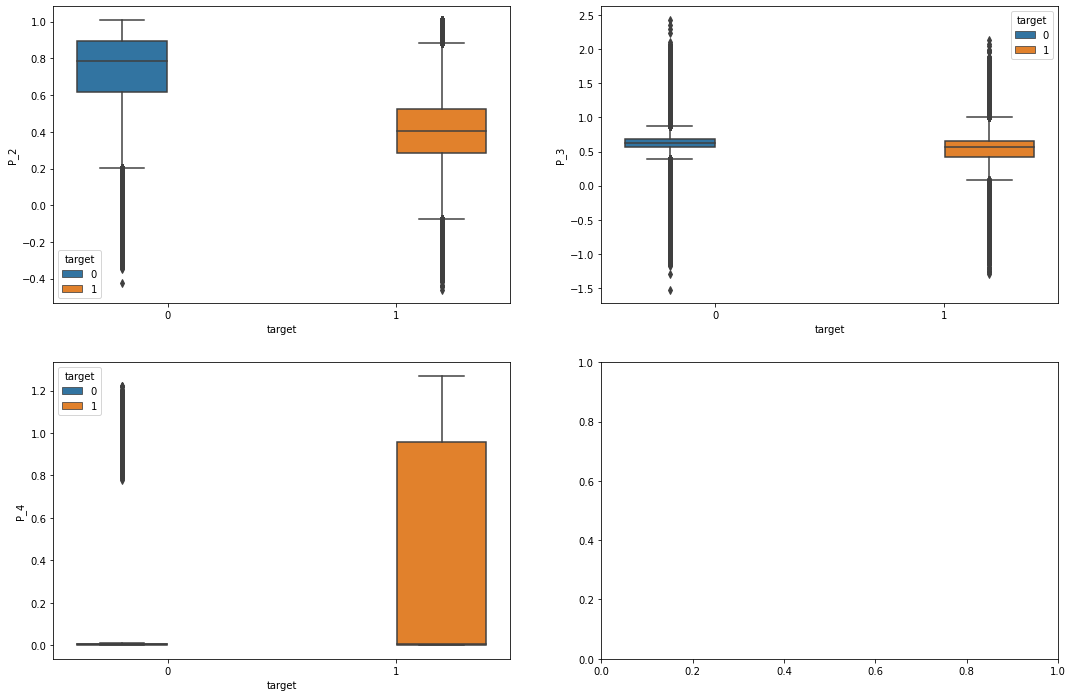

In [6]:
## Creating a new figure
fig, axes = plt.subplots(2, 2, figsize = (18, 12))

sns.boxplot(ax = axes[0, 0], x = 'target', y = 'P_2', hue = 'target', data = train)
sns.boxplot(ax = axes[0, 1], x = 'target', y = 'P_3', hue = 'target', data = train)
sns.boxplot(ax = axes[1, 0], x = 'target', y = 'P_4', hue = 'target', data = train)

<AxesSubplot:xlabel='target', ylabel='P_4_sum'>

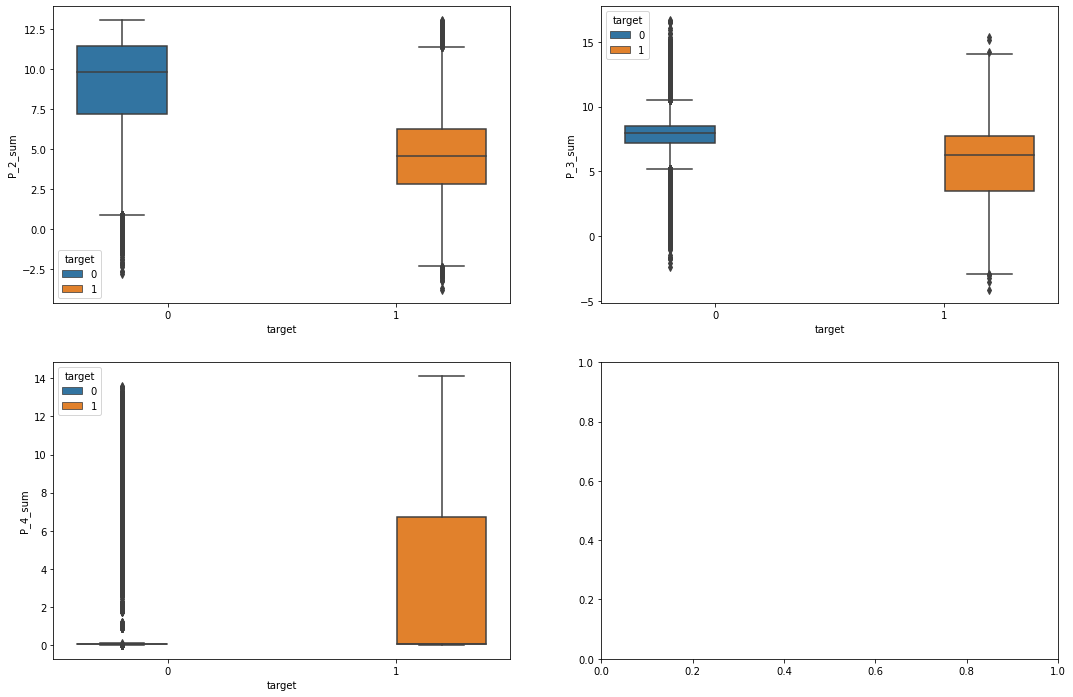

In [7]:
## Sum of 'P' variables
sum_value = train.groupby('customer_ID')[['P_2', 'P_3', 'P_4']].sum().reset_index(drop = False)
target = train.groupby('customer_ID')['target'].max().reset_index(drop = False)
target_sums = sum_value.merge(target, how = 'left', on = 'customer_ID')
target_sums.columns = ['customer_ID', 'P_2_sum', 'P_3_sum', 'P_4_sum', 'target']

## Creating a new figure
fig, axes = plt.subplots(2, 2, figsize = (18, 12))

sns.boxplot(ax = axes[0, 0], x = 'target', y = 'P_2_sum', hue = 'target', data = target_sums)
sns.boxplot(ax = axes[0, 1], x = 'target', y = 'P_3_sum', hue = 'target', data = target_sums)
sns.boxplot(ax = axes[1, 0], x = 'target', y = 'P_4_sum', hue = 'target', data = target_sums)

#### Selections: P_2, P_2_sum, P_3, P_3_sum

In [20]:
## Creating new Payment variables based on analysis and using the variable_engineering.py file

P_2_mean = ve.create_var(train, 'P_2', 'mean', 'P_2_mean')
P_2_median = ve.create_var(train, 'P_2', 'median', 'P_2_median')
P_2_sum = ve.create_var(train, 'P_2', 'sum', 'P_2_sum')

P_3_mean = ve.create_var(train, 'P_3', 'mean', 'P_3_mean')
P_3_median = ve.create_var(train, 'P_3', 'median', 'P_3_median')
P_3_sum = ve.create_var(train, 'P_3', 'sum', 'P_3_sum')

## Concatenating all data-frames into a single object
payment_vars = pd.concat([P_2_mean, P_2_median.iloc[:, 1], P_2_sum.iloc[:, 1], P_3_mean.iloc[:, 1], 
                          P_3_median.iloc[:, 1], P_3_sum.iloc[:, 1]], axis = 1)

payment_vars.head()

,customer_ID,P_2_mean,P_2_median,P_2_sum,P_3_mean,P_3_median,P_3_sum
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0.933594,0.938477,12.140625,0.680176,0.689941,8.843750
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,0.899902,0.904785,11.695312,0.566895,0.570801,7.367188
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0.878418,0.884766,11.421875,0.618164,0.629883,8.039062
3,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,0.599121,0.598145,7.785156,0.610840,0.623047,7.941406
4,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,0.891602,0.879395,11.593750,0.527344,0.560059,6.855469


#### Spend Variables

In [11]:
s_variables = train.columns
[x for x in s_variables if x.startswith('S_')]

['S_3',
 'S_5',
 'S_6',
 'S_7',
 'S_8',
 'S_9',
 'S_11',
 'S_12',
 'S_13',
 'S_15',
 'S_16',
 'S_17',
 'S_18',
 'S_19',
 'S_20',
 'S_22',
 'S_23',
 'S_24',
 'S_25',
 'S_26',
 'S_27']

<AxesSubplot:xlabel='target', ylabel='S_27'>

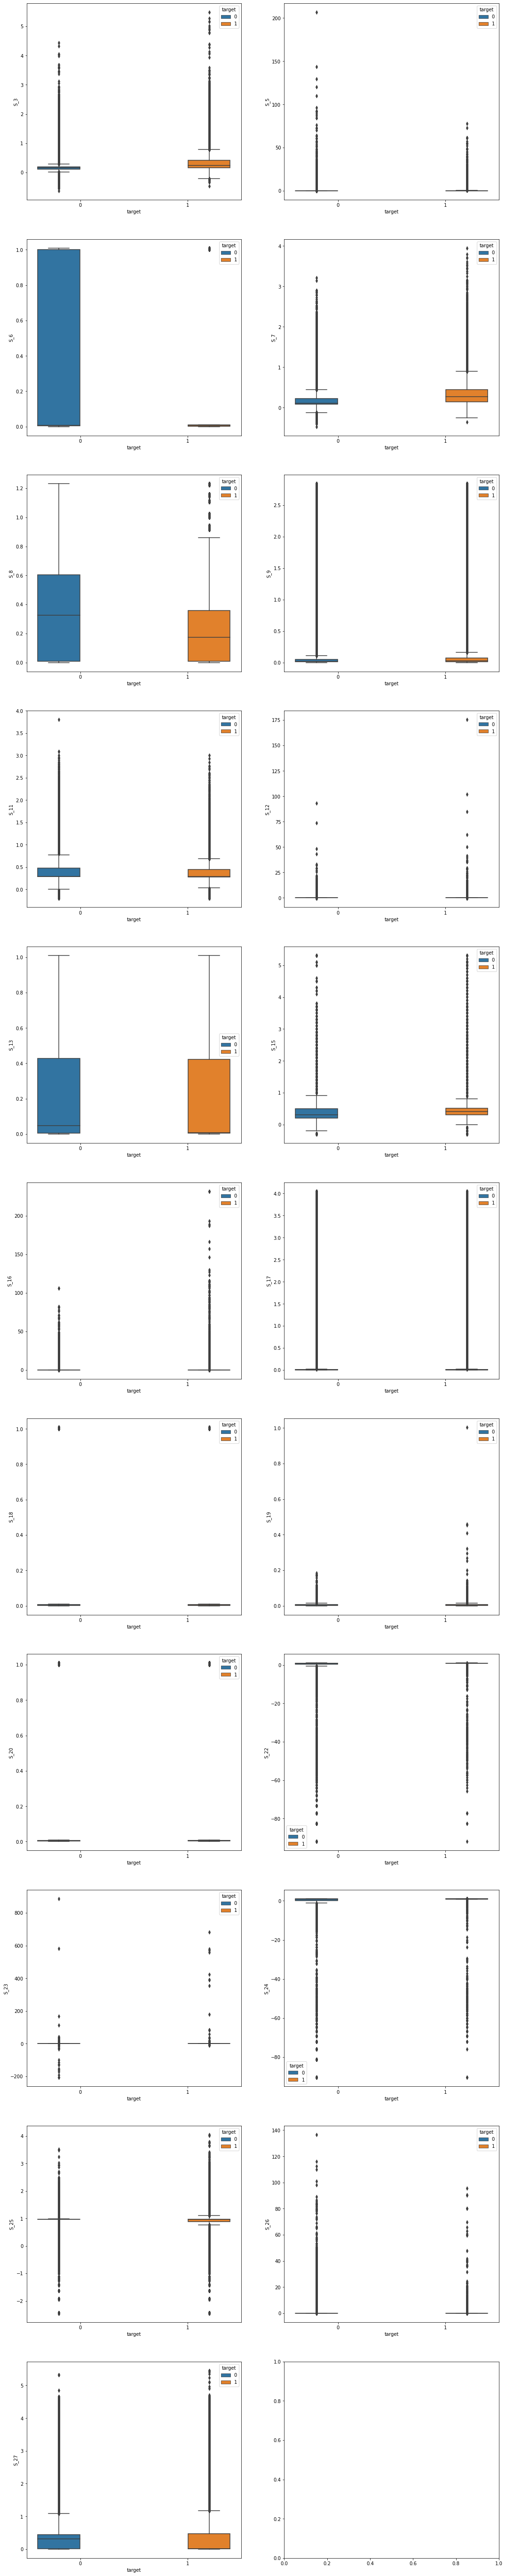

In [12]:
## Creating a new figure
fig, axes = plt.subplots(11, 2, figsize = (18, 100))

sns.boxplot(ax = axes[0, 0], x = 'target', y = 'S_3', hue = 'target', data = train)
sns.boxplot(ax = axes[0, 1], x = 'target', y = 'S_5', hue = 'target', data = train)
sns.boxplot(ax = axes[1, 0], x = 'target', y = 'S_6', hue = 'target', data = train)
sns.boxplot(ax = axes[1, 1], x = 'target', y = 'S_7', hue = 'target', data = train)
sns.boxplot(ax = axes[2, 0], x = 'target', y = 'S_8', hue = 'target', data = train)
sns.boxplot(ax = axes[2, 1], x = 'target', y = 'S_9', hue = 'target', data = train)
sns.boxplot(ax = axes[3, 0], x = 'target', y = 'S_11', hue = 'target', data = train)
sns.boxplot(ax = axes[3, 1], x = 'target', y = 'S_12', hue = 'target', data = train)
sns.boxplot(ax = axes[4, 0], x = 'target', y = 'S_13', hue = 'target', data = train)
sns.boxplot(ax = axes[4, 1], x = 'target', y = 'S_15', hue = 'target', data = train)
sns.boxplot(ax = axes[5, 0], x = 'target', y = 'S_16', hue = 'target', data = train)
sns.boxplot(ax = axes[5, 1], x = 'target', y = 'S_17', hue = 'target', data = train)
sns.boxplot(ax = axes[6, 0], x = 'target', y = 'S_18', hue = 'target', data = train)
sns.boxplot(ax = axes[6, 1], x = 'target', y = 'S_19', hue = 'target', data = train)
sns.boxplot(ax = axes[7, 0], x = 'target', y = 'S_20', hue = 'target', data = train)
sns.boxplot(ax = axes[7, 1], x = 'target', y = 'S_22', hue = 'target', data = train)
sns.boxplot(ax = axes[8, 0], x = 'target', y = 'S_23', hue = 'target', data = train)
sns.boxplot(ax = axes[8, 1], x = 'target', y = 'S_24', hue = 'target', data = train)
sns.boxplot(ax = axes[9, 0], x = 'target', y = 'S_25', hue = 'target', data = train)
sns.boxplot(ax = axes[9, 1], x = 'target', y = 'S_26', hue = 'target', data = train)
sns.boxplot(ax = axes[10, 0], x = 'target', y = 'S_27', hue = 'target', data = train)

In [13]:
## Sum of 'S' variables
sum_value = train.groupby('customer_ID')[['S_3', 'S_5', 'S_6', 'S_7', 'S_8', 'S_9', 
                                          'S_11', 'S_12', 'S_13', 'S_15', 'S_16', 'S_17', 
                                          'S_18', 'S_19', 'S_20', 'S_22', 'S_23', 'S_24', 
                                          'S_25', 'S_26', 'S_27']].sum().reset_index(drop = False)
target = train.groupby('customer_ID')['target'].max().reset_index(drop = False)
target_sums = sum_value.merge(target, how = 'left', on = 'customer_ID')
target_sums.columns = ['customer_ID', 'S_3_sum', 'S_5_sum', 'S_6_sum', 'S_7_sum', 'S_8_sum', 'S_9_sum', 
                                          'S_11_sum', 'S_12_sum', 'S_13_sum', 'S_15_sum', 'S_16_sum', 'S_17_sum', 
                                          'S_18_sum', 'S_19_sum', 'S_20_sum', 'S_22_sum', 'S_23_sum', 'S_24_sum', 
                                          'S_25_sum', 'S_26_sum', 'S_27_sum', 'target']

<AxesSubplot:xlabel='target', ylabel='S_27_sum'>

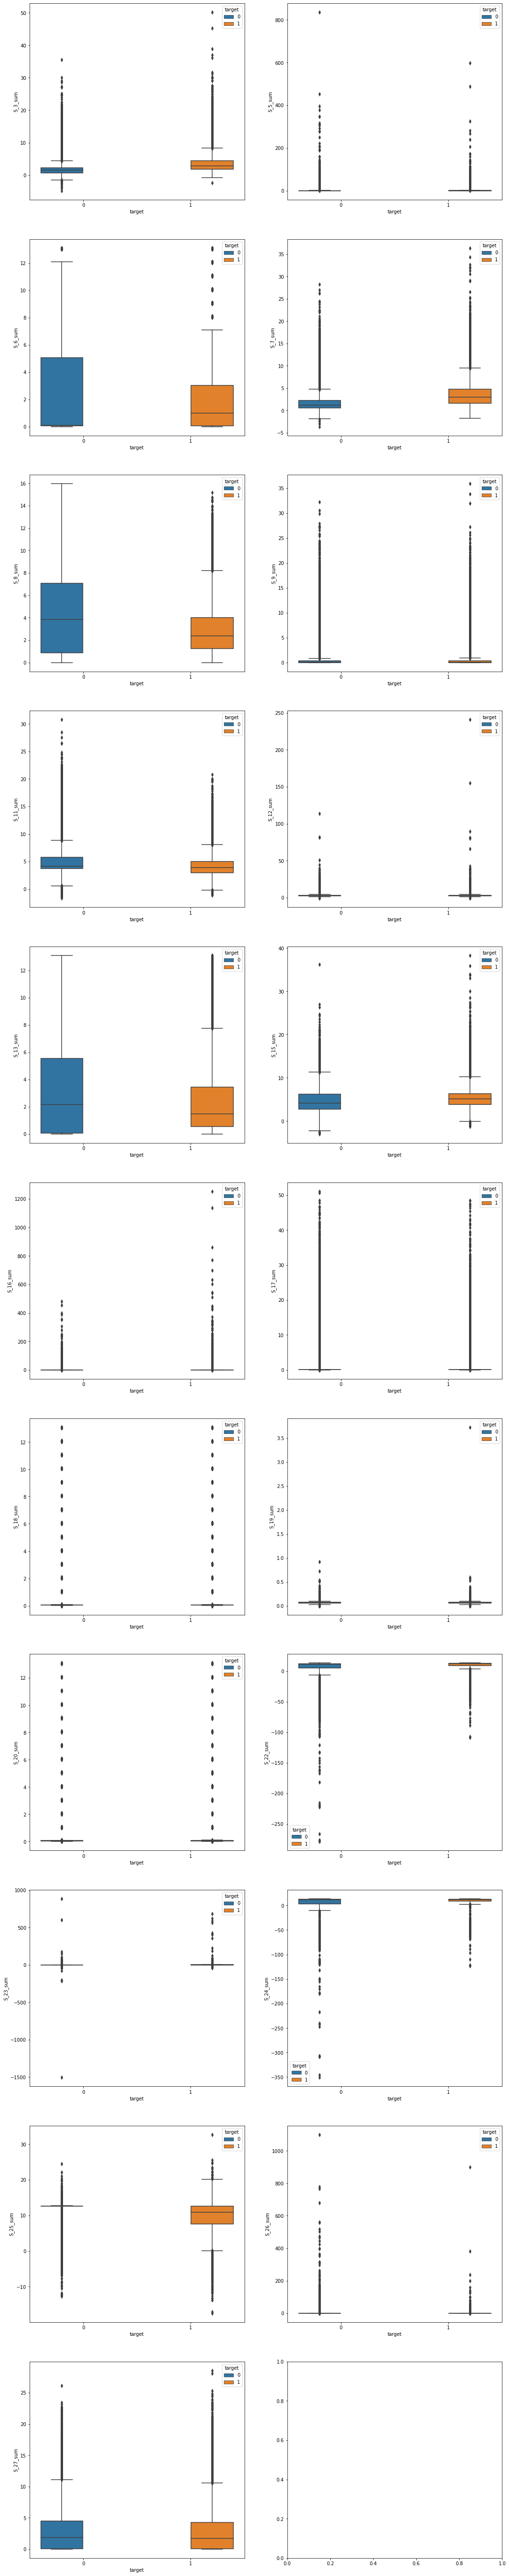

In [14]:
## Creating a new figure
fig, axes = plt.subplots(11, 2, figsize = (18, 100))

sns.boxplot(ax = axes[0, 0], x = 'target', y = 'S_3_sum', hue = 'target', data = target_sums)
sns.boxplot(ax = axes[0, 1], x = 'target', y = 'S_5_sum', hue = 'target', data = target_sums)
sns.boxplot(ax = axes[1, 0], x = 'target', y = 'S_6_sum', hue = 'target', data = target_sums)
sns.boxplot(ax = axes[1, 1], x = 'target', y = 'S_7_sum', hue = 'target', data = target_sums)
sns.boxplot(ax = axes[2, 0], x = 'target', y = 'S_8_sum', hue = 'target', data = target_sums)
sns.boxplot(ax = axes[2, 1], x = 'target', y = 'S_9_sum', hue = 'target', data = target_sums)
sns.boxplot(ax = axes[3, 0], x = 'target', y = 'S_11_sum', hue = 'target', data = target_sums)
sns.boxplot(ax = axes[3, 1], x = 'target', y = 'S_12_sum', hue = 'target', data = target_sums)
sns.boxplot(ax = axes[4, 0], x = 'target', y = 'S_13_sum', hue = 'target', data = target_sums)
sns.boxplot(ax = axes[4, 1], x = 'target', y = 'S_15_sum', hue = 'target', data = target_sums)
sns.boxplot(ax = axes[5, 0], x = 'target', y = 'S_16_sum', hue = 'target', data = target_sums)
sns.boxplot(ax = axes[5, 1], x = 'target', y = 'S_17_sum', hue = 'target', data = target_sums)
sns.boxplot(ax = axes[6, 0], x = 'target', y = 'S_18_sum', hue = 'target', data = target_sums)
sns.boxplot(ax = axes[6, 1], x = 'target', y = 'S_19_sum', hue = 'target', data = target_sums)
sns.boxplot(ax = axes[7, 0], x = 'target', y = 'S_20_sum', hue = 'target', data = target_sums)
sns.boxplot(ax = axes[7, 1], x = 'target', y = 'S_22_sum', hue = 'target', data = target_sums)
sns.boxplot(ax = axes[8, 0], x = 'target', y = 'S_23_sum', hue = 'target', data = target_sums)
sns.boxplot(ax = axes[8, 1], x = 'target', y = 'S_24_sum', hue = 'target', data = target_sums)
sns.boxplot(ax = axes[9, 0], x = 'target', y = 'S_25_sum', hue = 'target', data = target_sums)
sns.boxplot(ax = axes[9, 1], x = 'target', y = 'S_26_sum', hue = 'target', data = target_sums)
sns.boxplot(ax = axes[10, 0], x = 'target', y = 'S_27_sum', hue = 'target', data = target_sums)

#### Selections: S_3, S_3_sum, S_6_sum, S_7, S_7_sum, S_8, S_8_sum, S_13_sum, S_15, S_15_sum

In [27]:
## Creating new Spend variables based on analysis and using the variable_engineering.py file

S_3_mean = ve.create_var(train, 'S_3', 'mean', 'S_3_mean')
S_3_median = ve.create_var(train, 'S_3', 'median', 'S_3_median')
S_3_sum = ve.create_var(train, 'S_3', 'sum', 'S_3_sum')

S_6_sum = ve.create_var(train, 'S_6', 'sum', 'S_6_sum')

S_7_mean = ve.create_var(train, 'S_7', 'mean', 'S_7_mean')
S_7_median = ve.create_var(train, 'S_7', 'median', 'S_7_median')
S_7_sum = ve.create_var(train, 'S_7', 'sum', 'S_7_sum')

S_8_mean = ve.create_var(train, 'S_8', 'mean', 'S_8_mean')
S_8_median = ve.create_var(train, 'S_8', 'median', 'S_8_median')
S_8_sum = ve.create_var(train, 'S_8', 'sum', 'S_8_sum')

S_13_sum = ve.create_var(train, 'S_13', 'sum', 'S_13_sum')

S_15_mean = ve.create_var(train, 'S_15', 'mean', 'S_15_mean')
S_15_median = ve.create_var(train, 'S_15', 'median', 'S_15_median')
S_15_sum = ve.create_var(train, 'S_15', 'sum', 'S_15_sum')

## Concatenating all data-frames into a single object
spend_vars = pd.concat([S_3_mean, S_3_median.iloc[:, 1], S_3_sum.iloc[:, 1], S_6_sum.iloc[:, 1], S_7_mean.iloc[:, 1], S_7_median.iloc[:, 1], 
                        S_7_sum.iloc[:, 1], S_8_mean.iloc[:, 1], S_8_median.iloc[:, 1], S_8_sum.iloc[:, 1], S_13_sum.iloc[:, 1], 
                        S_15_mean.iloc[:, 1], S_15_median.iloc[:, 1], S_15_sum.iloc[:, 1]], axis = 1)

spend_vars.head()

,customer_ID,S_3_mean,S_3_median,S_3_sum,S_6_sum,S_7_mean,S_7_median,S_7_sum,S_8_mean,S_8_median,S_8_sum,S_13_sum,S_15_mean,S_15_median,S_15_sum
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0.113220,0.110962,1.471680,0.060425,0.098389,0.093567,1.279297,0.796875,0.759277,10.359375,8.507812,0.173340,0.200928,2.253906
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,0.120605,0.120483,1.567383,0.049683,0.103027,0.095337,1.338867,0.411133,0.358398,5.343750,1.888672,0.265381,0.208130,3.451172
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,NaN,NaN,0.000000,13.070312,NaN,NaN,0.000000,0.006432,0.006962,0.083618,0.048309,0.505371,0.504883,6.566406
3,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,0.247803,0.228149,3.220703,0.071838,0.261475,0.260498,3.398438,0.308594,0.319092,4.011719,5.519531,0.414062,0.408447,5.382812
4,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,0.173096,0.174805,0.692383,11.062500,0.120300,0.122437,0.481201,0.053467,0.003944,0.694824,0.059204,0.474854,0.503906,6.171875


In [28]:
spend_vars.at[2, 'customer_ID']

'00001b22f846c82c51f6e3958ccd81970162bae8b007e80662ef27519fcc18c1'

In [29]:
train[train['customer_ID'] == '00001b22f846c82c51f6e3958ccd81970162bae8b007e80662ef27519fcc18c1']

,customer_ID,P_2,P_3,P_4,S_3,S_5,S_6,S_7,S_8,S_9,S_11,S_12,S_13,S_15,S_16,S_17,S_18,S_19,S_20,S_22,S_23,S_24,S_25,S_26,S_27,target
26,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0.876465,0.634766,0.008980,NaN,0.007874,1.007812,NaN,0.006359,NaN,0.283447,0.193604,0.002106,0.501465,0.008400,0.004471,0.006042,0.003897,0.006157,0.295654,0.132568,0.085999,0.975586,0.006355,NaN,0
27,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0.887207,0.629883,0.006485,NaN,0.007454,1.004883,NaN,0.006962,NaN,0.281738,0.188477,0.002060,0.504883,0.002089,0.008041,0.006023,0.007881,0.007565,0.296875,0.137451,0.081604,0.973145,0.008690,NaN,0
28,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0.884766,0.629395,0.008629,NaN,0.004688,1.003906,NaN,0.006199,NaN,0.286865,0.191772,0.001449,0.508789,0.004322,0.007767,0.002516,0.002707,0.004158,0.299805,0.132812,0.082520,0.974609,0.002256,NaN,0
29,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0.852539,0.603027,0.007397,NaN,0.008125,1.007812,NaN,0.008064,NaN,0.287354,0.192383,0.008286,0.504883,0.004204,0.003176,0.009674,0.006077,0.005810,0.298828,0.134399,0.079651,0.977539,0.009285,NaN,0
30,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0.891602,0.666992,0.001769,NaN,0.006435,1.006836,NaN,0.001751,NaN,0.287842,0.190063,0.009445,0.509766,0.001363,0.001638,0.001257,0.007626,0.005650,0.304199,0.133423,0.086304,0.969238,0.006683,NaN,0
31,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0.902344,0.659180,0.001018,NaN,0.007835,1.003906,NaN,0.009521,NaN,0.285645,0.192261,0.000469,0.500488,0.001897,0.005791,0.003199,0.004528,0.009895,0.304443,0.138184,0.085632,0.971191,0.005325,NaN,0
32,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0.904297,0.658203,0.009705,NaN,0.001197,1.007812,NaN,0.008461,NaN,0.282471,0.187988,0.003305,0.508301,0.003654,0.006214,0.008949,0.006203,0.006348,0.303955,0.131470,0.078369,0.975586,0.003889,NaN,0
33,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0.903809,0.651855,0.003933,NaN,0.001054,1.002930,NaN,0.000590,NaN,0.289307,0.190186,0.000756,0.506836,0.000258,0.001010,0.001883,0.008072,0.004051,0.295166,0.137207,0.077820,0.976074,0.000272,NaN,0
34,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0.797852,0.381104,0.008659,NaN,0.008728,1.008789,NaN,0.004021,NaN,0.282959,0.192627,0.002443,0.500977,0.004505,0.000739,0.005310,0.000252,0.000713,0.302490,0.140137,0.046478,0.972656,0.009827,NaN,0
35,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0.872070,0.627441,0.004673,NaN,0.008667,1.002930,NaN,0.004028,NaN,0.283203,0.193115,0.004307,0.504395,0.004795,0.005096,0.001328,0.005112,0.001379,0.299316,0.132812,0.081238,0.979004,0.004860,NaN,0


#### Merging newly created variables into single data-frame:

In [30]:
cleaned = pd.concat([payment_vars, spend_vars.iloc[:, 1:]], axis = 1)

cleaned.head()

,customer_ID,P_2_mean,P_2_median,P_2_sum,P_3_mean,P_3_median,P_3_sum,S_3_mean,S_3_median,S_3_sum,S_6_sum,S_7_mean,S_7_median,S_7_sum,S_8_mean,S_8_median,S_8_sum,S_13_sum,S_15_mean,S_15_median,S_15_sum
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0.933594,0.938477,12.140625,0.680176,0.689941,8.843750,0.113220,0.110962,1.471680,0.060425,0.098389,0.093567,1.279297,0.796875,0.759277,10.359375,8.507812,0.173340,0.200928,2.253906
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,0.899902,0.904785,11.695312,0.566895,0.570801,7.367188,0.120605,0.120483,1.567383,0.049683,0.103027,0.095337,1.338867,0.411133,0.358398,5.343750,1.888672,0.265381,0.208130,3.451172
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0.878418,0.884766,11.421875,0.618164,0.629883,8.039062,NaN,NaN,0.000000,13.070312,NaN,NaN,0.000000,0.006432,0.006962,0.083618,0.048309,0.505371,0.504883,6.566406
3,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,0.599121,0.598145,7.785156,0.610840,0.623047,7.941406,0.247803,0.228149,3.220703,0.071838,0.261475,0.260498,3.398438,0.308594,0.319092,4.011719,5.519531,0.414062,0.408447,5.382812
4,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,0.891602,0.879395,11.593750,0.527344,0.560059,6.855469,0.173096,0.174805,0.692383,11.062500,0.120300,0.122437,0.481201,0.053467,0.003944,0.694824,0.059204,0.474854,0.503906,6.171875


In [31]:
cleaned.shape

(458913, 21)

### Variable Importance

In [ ]:
## Using the train data-frame to engineer variable interactions

## Defining the input and target variables
X = train[['P_2', 'P_3', 'P_4', 'S_3', 'S_5', 'S_6', 'S_7', 'S_8', 'S_9', 'S_11', 'S_12', 'S_13', 'S_15', 
           'S_16', 'S_17', 'S_18', 'S_19', 'S_20', 'S_22', 'S_23', 'S_24', 'S_25', 'S_26', 'S_27']]
Y = train['target']

## Defining a list to store results
results = []

## Repeating process 100 times
for i in tqdm(range(0, 5)):
    
    ## Splitting the data
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.8, stratify = Y)
    
    ## Building the model
    rf_md = RandomForestClassifier(max_depth = 3, n_estimators = 100).fit(X_train, Y_train)
    
    ## Extracting feature importance scores
    results.append(rf_md.feature_importances_)
    
## Changing results list to a dataframe
results = pd.DataFrame(results, columns = X.columns)

## Computing averages and sorting variables by importance
results = pd.DataFrame(results.apply(np.mean, axis = 0))
results = pd.DataFrame({'Feature': results.index, 'Importance': results[0].values}).sort_values(by = 'Importance', ascending = False)

results